## MNIST Digits Data Augmentation

This notebook outlines a simple procedure for augmenting/expanding the MNIST handwritten digits dataset. Each image is transformed by moving the image 1 pixel in 4 directions (up, right, down and left). The result is 4 transformed copies of the original image plus the original image totalling 5 copies. This transformation is applied to all images in the dataset, resulting in a new dataset of size 70,000 images * 5 copies/image = 350,000 images.

In [2]:
# Import dependencies
import numpy as np
import scipy.ndimage.interpolation as interp
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [3]:
# Fetch the digits dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

In [4]:
# Shift an image down and/or right by a specified amount (in pixels)
def shift_image(image, num_px_down=0, num_px_right=0):
    return interp.shift(image, [num_px_down, num_px_right], cval=0)

In [5]:
# Displays a row of images
def display_images(images):
    num_images = len(images)
    f, ax = plt.subplots(1, num_images)
    for i in range(num_images):
        ax[i].imshow(images[i], cmap='binary')
    
    plt.axis=('off')
    plt.show()

In [6]:
# Reshape images in dataset (28 pixels by 28 pixels)
X_reshaped = [image.reshape(28, 28) for image in X]

In [7]:
# Perform data augmentation (shift each image up/right/down/left by 1 pixel each)
directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
X_shifted = []

for i, image in enumerate(X_reshaped):
    X_shifted.append(image)
    for (num_px_down, num_px_right) in directions:
        shifted_image = shift_image(image, num_px_down, num_px_right)
        X_shifted.append(shifted_image)
    if (i+1) % 10000 == 0 and i != 0:
        print(f'Images processed: {i+1}')

Images processed: 10000
Images processed: 20000
Images processed: 30000
Images processed: 40000
Images processed: 50000
Images processed: 60000
Images processed: 70000


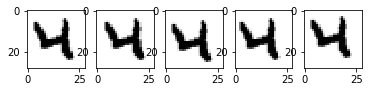

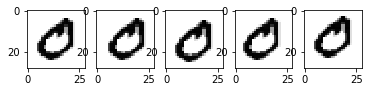

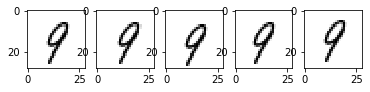

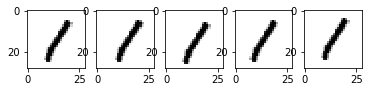

In [8]:
# See result of augmentation
copies = 5
num_items = 4
start = 100

for i in range(start, start + len(X_shifted[:num_items*copies]), copies):
    display_images(X_shifted[i:i+copies])

In [9]:
# Finally flatten all images back to original feature vectors
X_new = [image.flatten() for image in X_shifted]

In [37]:
# Extend labels list
y_new = []
for label in y:
    y_new.extend([label] * copies)

In [38]:
# Check len's and shapes are as expected
len(X_shifted), X_shifted[0].shape, len(X_new), X_new[0].shape[0], len(y_new)

(350000, (28, 28), 350000, 784, 350000)

X_new now contains the augmented dataset and y_new contains the extended list of labels to accomodate the augmented dataset.